<a href="https://colab.research.google.com/github/NimmiJames/taxi-fare-prediction/blob/main/MyProgramTrainModelPredictTaxiFareChicago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Load the dataset (replace with your dataset path or URL)
url = "https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv"  # Example URL
data = pd.read_csv(url)
# Preprocess the data
# Select relevant features and target variable


next step


In [5]:
df = pd.read_csv(url)

# Inspect the first few rows and summary information
print(df.head())
print(df.info())
print(df.describe())


    TRIP_START_TIMESTAMP     TRIP_END_TIMESTAMP  TRIP_START_HOUR  \
0  05/17/2022 7:15:00 AM  05/17/2022 7:45:00 AM             7.25   
1  05/17/2022 5:15:00 PM  05/17/2022 5:30:00 PM            17.25   
2  05/17/2022 5:15:00 PM  05/17/2022 5:30:00 PM            17.25   
3  05/17/2022 6:00:00 PM  05/17/2022 7:00:00 PM            18.00   
4  05/17/2022 5:00:00 PM  05/17/2022 5:30:00 PM            17.00   

   TRIP_SECONDS  TRIP_MILES  TRIP_SPEED  PICKUP_CENSUS_TRACT  \
0          2341        2.57         4.0                  NaN   
1          1074        1.18         4.0                  NaN   
2          1173        1.29         4.0         1.703132e+10   
3          3360        3.70         4.0         1.703132e+10   
4          1044        1.15         4.0         1.703132e+10   

   DROPOFF_CENSUS_TRACT  PICKUP_COMMUNITY_AREA  DROPOFF_COMMUNITY_AREA   FARE  \
0                   NaN                    NaN                    17.0  31.99   
1          1.703108e+10                    N

This will give you an overview of the columns, data types, and basic statistics.


In [8]:
#@title Code - Read dataset

# Updates dataframe to use specific columns.
training_df = data[['TRIP_MILES', 'TRIP_SECONDS', 'FARE', 'COMPANY', 'PAYMENT_TYPE', 'TIP_RATE']]


In [9]:
print('Read dataset completed successfully.')
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.head(200)

Read dataset completed successfully.
Total number of rows: 12463




,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
2,1.29,1173,10.25,Sun Taxi,Cash,0.0
3,3.70,3360,23.75,Choice Taxi Association,Cash,0.0
4,1.15,1044,10.00,Flash Cab,Cash,0.0
5,1.38,1251,11.00,Flash Cab,Credit Card,27.3
6,2.00,1813,14.50,Sun Taxi,Cash,0.0
...,...,...,...,...,...,...
305,0.82,555,6.50,Flash Cab,Credit Card,53.3
307,0.55,372,5.50,Flash Cab,Cash,0.0
308,1.08,729,7.75,Sun Taxi,Credit Card,25.8
309,0.80,540,9.25,"Taxicab Insurance Agency, LLC",Cash,0.0


In [10]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=training_df)

https://docs.google.com/spreadsheets/d/1RgmXd9h6yvmpItpwERztueMDQvkpstCpHUdJlWT6KRQ#gid=0


In [11]:
# Check for missing values
print(df.isnull().sum())



TRIP_START_TIMESTAMP          0
TRIP_END_TIMESTAMP            0
TRIP_START_HOUR               0
TRIP_SECONDS                  0
TRIP_MILES                    0
TRIP_SPEED                    0
PICKUP_CENSUS_TRACT       18435
DROPOFF_CENSUS_TRACT      17671
PICKUP_COMMUNITY_AREA      3217
DROPOFF_COMMUNITY_AREA     3495
FARE                          0
TIPS                          0
TIP_RATE                      0
TOLLS                         0
EXTRAS                        0
TRIP_TOTAL                    0
PAYMENT_TYPE                  0
COMPANY                       0
dtype: int64


In [12]:
data = data.dropna()


In [13]:
X = data['TRIP_MILES'].values  # Feature: Trip distance in miles
y = data['FARE'].values        # Target: Fare amount

In [14]:
# Normalize the data (optional but recommended)
X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Add a bias term (intercept) to the feature matrix
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

What’s Happening Here?
Load the Dataset:

The dataset is loaded from a URL (or a local file) using pd.read_csv().

The dataset contains information about taxi trips, including features like trip_miles (distance) and the target variable fare.

Preprocess the Data:

Missing values are dropped using data.dropna() to ensure clean data.

The feature (trip_miles) and target (fare) are extracted.

Normalize the Data:

Normalization scales the data to have a mean of 0 and a standard deviation of 1. This helps gradient descent converge faster.

Formula:
X
normalized
=
X
−
μ
σ
X
normalized
​
 =
σ
X−μ
​
 , where
μ
μ is the mean and
σ
σ is the standard deviation.

Split the Data:

The dataset is split into training and testing sets using an 80-20 split.

Add a Bias Term:

A column of ones is added to the feature matrix to account for the intercept term in the linear regression equation.

In [15]:
class LinearRegression:
    def __init__(self):
        self.theta = None  # Parameters (weights)

    def hypothesis(self, X, theta):
        return np.dot(X, theta)  # y_pred = X * theta

    def cost_function(self, X, y, theta):
        m = len(y)
        y_pred = self.hypothesis(X, theta)
        return (1 / (2 * m)) * np.sum((y_pred - y) ** 2)  # Mean Squared Error

    def gradient_descent(self, X, y, theta, learning_rate, num_iterations):
        m = len(y)
        cost_history = []

        for _ in range(num_iterations):
            y_pred = self.hypothesis(X, theta)
            gradient = (1 / m) * np.dot(X.T, (y_pred - y))  # Compute gradient
            theta -= learning_rate * gradient  # Update parameters
            cost = self.cost_function(X, y, theta)
            cost_history.append(cost)

        return theta, cost_history

In [16]:
# Initialize parameters
theta = np.zeros(X_train.shape[1])  # Initialize weights to zero
learning_rate = 0.01
num_iterations = 1000

# Create an instance of LinearRegression
model = LinearRegression()

# Train the model using gradient descent
theta, cost_history = model.gradient_descent(X_train, y_train, theta, learning_rate, num_iterations)

# Print the learned parameters
print("Learned parameters (theta):", theta)

Learned parameters (theta): [0.02061012 1.02228503]


Mean Squared Error (MSE): 0.04587349013022322


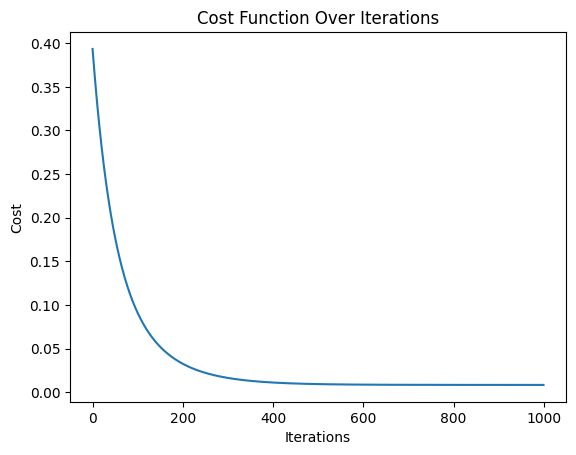

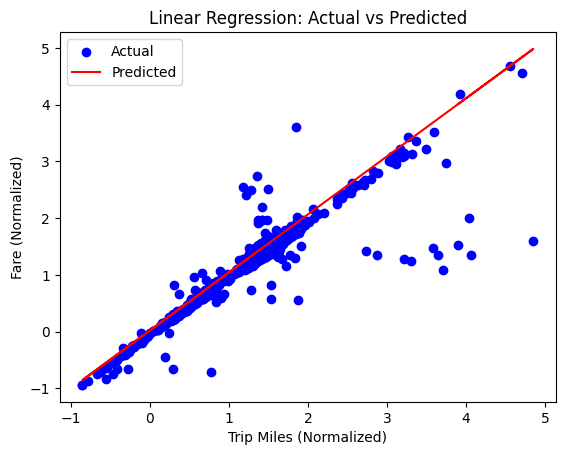

In [17]:
# Make predictions on the test set
y_pred = model.hypothesis(X_test, theta)

# Calculate Mean Squared Error (MSE)
mse = np.mean((y_pred - y_test) ** 2)
print("Mean Squared Error (MSE):", mse)

# Plot the cost history during training
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Over Iterations")
plt.show()

# Plot the regression line
plt.scatter(X_test[:, 1], y_test, color='blue', label="Actual")
plt.plot(X_test[:, 1], y_pred, color='red', label="Predicted")
plt.xlabel("Trip Miles (Normalized)")
plt.ylabel("Fare (Normalized)")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()

In [19]:
# Example: Predict fare for a new trip distance
new_trip_miles = 5.0  # Example input
new_trip_miles_normalized = (new_trip_miles - np.mean(X)) / np.std(X)  # Normalize input
new_X = np.array([1, new_trip_miles_normalized])  # Add bias term
predicted_fare_normalized = model.hypothesis(new_X, theta)

# Denormalize the predicted fare
predicted_fare = predicted_fare_normalized * np.std(y) + np.mean(y)
print(f"Predicted fare for a {new_trip_miles}-mile trip: ${predicted_fare:.2f}")

Predicted fare for a 5.0-mile trip: $5.13
